### Importing required libraries

In [1]:
import pandas as pd
import sys

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 
import string

In [3]:
data = pd.read_csv(r"C:\Users\Lenovo\Documents\jupyter notebook DATA SCIENCE\Unsupervised Lerarning\Mypracise\tweets.csv")

In [4]:
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [5]:
data.isna().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [6]:
data.shape

(11370, 5)

In [7]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [8]:
data['text'].unique()

array(['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…',
       'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…',
       'Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI',
       ...,
       'i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this https://t.co/psLBecS7hI',
       'ok who remember "outcast" nd the "dora" au?? THOSE AU WRECKED OUR NERVES ND BRAINCELLS JDKSHSSJHS LEGENDS',
       'Jake Corway wrecked while running 14th at IRP.'], dtype=object)

### Seperating Tweets from the data for Processing

In [9]:
tweets = data['text']

### Tokenizing the data and joining back together

In [10]:
from nltk import TweetTokenizer
tk = TweetTokenizer()
tweets = tweets.apply(lambda x: tk.tokenize(x)).apply(lambda x : ' '.join(x))
tweets

0        Communal violence in Bhainsa , Telangana . " S...
1        Telangana : Section 144 has been imposed in Bh...
2        Arsonist sets cars ablaze at dealership https:...
3        Arsonist sets cars ablaze at dealership https:...
4        " Lord Jesus , your love brings freedom and pa...
                               ...                        
11365    Media should have warned us well in advance . ...
11366    i feel directly attacked 💀 i consider moonbin ...
11367    i feel directly attacked 💀 i consider moonbin ...
11368    ok who remember " outcast " nd the " dora " au...
11369      Jake Corway wrecked while running 14th at IRP .
Name: text, Length: 11370, dtype: object

### Removing URL and HTML links 

URL removing

In [11]:
def url_remove(tweets):
    url_rm = re.compile(r'https?://\S+|www\.\S+')
    return url_rm.sub(r'',tweets)
tweets = tweets.apply(lambda x: url_remove(x))
tweets

0        Communal violence in Bhainsa , Telangana . " S...
1        Telangana : Section 144 has been imposed in Bh...
2                 Arsonist sets cars ablaze at dealership 
3                Arsonist sets cars ablaze at dealership  
4        " Lord Jesus , your love brings freedom and pa...
                               ...                        
11365    Media should have warned us well in advance . ...
11366    i feel directly attacked 💀 i consider moonbin ...
11367    i feel directly attacked 💀 i consider moonbin ...
11368    ok who remember " outcast " nd the " dora " au...
11369      Jake Corway wrecked while running 14th at IRP .
Name: text, Length: 11370, dtype: object

HTML removing

In [12]:
def remove_html(tweets):
    html= re.compile(r'<.*?>')
    return html.sub(r'',tweets)

In [13]:
tweets = tweets.apply(lambda x: remove_html(x))
tweets

0        Communal violence in Bhainsa , Telangana . " S...
1        Telangana : Section 144 has been imposed in Bh...
2                 Arsonist sets cars ablaze at dealership 
3                Arsonist sets cars ablaze at dealership  
4        " Lord Jesus , your love brings freedom and pa...
                               ...                        
11365    Media should have warned us well in advance . ...
11366    i feel directly attacked 💀 i consider moonbin ...
11367    i feel directly attacked 💀 i consider moonbin ...
11368    ok who remember " outcast " nd the " dora " au...
11369      Jake Corway wrecked while running 14th at IRP .
Name: text, Length: 11370, dtype: object

### Removing emojis

In [14]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [15]:
tweets = tweets.apply(lambda x: remove_emoji(x))
tweets

0        Communal violence in Bhainsa , Telangana . " S...
1        Telangana : Section 144 has been imposed in Bh...
2                 Arsonist sets cars ablaze at dealership 
3                Arsonist sets cars ablaze at dealership  
4        " Lord Jesus , your love brings freedom and pa...
                               ...                        
11365    Media should have warned us well in advance . ...
11366    i feel directly attacked  i consider moonbin &...
11367    i feel directly attacked  i consider moonbin &...
11368    ok who remember " outcast " nd the " dora " au...
11369      Jake Corway wrecked while running 14th at IRP .
Name: text, Length: 11370, dtype: object

### Removing shortwords and punctuations

Removing puntcuations

In [16]:
tweets = tweets.str.replace('[^a-zA-Z]+',' ')
tweets

0        Communal violence in Bhainsa Telangana Stones ...
1        Telangana Section has been imposed in Bhainsa ...
2                 Arsonist sets cars ablaze at dealership 
3                 Arsonist sets cars ablaze at dealership 
4         Lord Jesus your love brings freedom and pardo...
                               ...                        
11365    Media should have warned us well in advance Th...
11366    i feel directly attacked i consider moonbin ji...
11367    i feel directly attacked i consider moonbin ji...
11368    ok who remember outcast nd the dora au THOSE A...
11369         Jake Corway wrecked while running th at IRP 
Name: text, Length: 11370, dtype: object

Removing shortwords

In [17]:
from nltk.tokenize import word_tokenize
tweets = tweets.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w) >= 3]))
tweets

0        Communal violence Bhainsa Telangana Stones wer...
1        Telangana Section has been imposed Bhainsa fro...
2                     Arsonist sets cars ablaze dealership
3                     Arsonist sets cars ablaze dealership
4        Lord Jesus your love brings freedom and pardon...
                               ...                        
11365    Media should have warned well advance This wre...
11366    feel directly attacked consider moonbin jinjin...
11367    feel directly attacked consider moonbin jinjin...
11368    who remember outcast the dora THOSE WRECKED OU...
11369                Jake Corway wrecked while running IRP
Name: text, Length: 11370, dtype: object

### Stemming 


In [20]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
tweets = tweets.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x) ]).apply(lambda x:' '.join(x))
tweets

0        communal violenc bhainsa telangana stone were ...
1        telangana section has been impos bhainsa from ...
2                        arsonist set car ablaz dealership
3                        arsonist set car ablaz dealership
4        lord jesus your love bring freedom and pardon ...
                               ...                        
11365    media should have warn well advanc this wreck ...
11366    feel direct attack consid moonbin jinjin bias ...
11367    feel direct attack consid moonbin jinjin bias ...
11368    who rememb outcast the dora those wreck our ne...
11369                      jake corway wreck while run irp
Name: text, Length: 11370, dtype: object

### Removing shortwords

In [21]:
from nltk.corpus import stopwords 
stop = stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in word_tokenize(x) if i not in stop]).apply(lambda x: ' '.join(x))
tweets

0        communal violenc bhainsa telangana stone pelt ...
1        telangana section impos bhainsa januari clash ...
2                        arsonist set car ablaz dealership
3                        arsonist set car ablaz dealership
4        lord jesus love bring freedom pardon fill holi...
                               ...                        
11365    media warn well advanc wreck whole night refus...
11366    feel direct attack consid moonbin jinjin bias ...
11367    feel direct attack consid moonbin jinjin bias ...
11368    rememb outcast dora wreck nerv braincel jdkshs...
11369                            jake corway wreck run irp
Name: text, Length: 11370, dtype: object

# TFIDF VECTORIZATION

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = stop)
data_vec = vec.fit_transform(tweets)

In [23]:
data.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [24]:
#Seperating label y from the train_data
y = data.target
y = y.values
y

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [25]:
#Value counts of 0 and 1 to check the imbalance of the data
pd.Series(y).value_counts()

0    9256
1    2114
dtype: int64

## Splitting train and test data

In [26]:
#Splitting the train data into X_train, y_train (train_set), X_test, y_test (test_set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size = 0.2, stratify = y,random_state=42)

In [27]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6560364464692483

## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_res, y_res)
y_pred2 = model2.predict(X_test)

In [31]:
f1_score(y_test,y_pred2)

0.6422535211267606

## XGBoost Classifier

In [32]:
from xgboost import XGBClassifier 
model3 = XGBClassifier()
model3.fit(X_res, y_res)
y_pred3 = model3.predict(X_test)

In [33]:
f1_score(y_test,y_pred3)

0.5702479338842975

## Support vector machine

In [34]:
from sklearn.svm import SVC  
model4= SVC()
model4.fit(X_res,y_res)
y_pred4 = model4.predict(X_test)

In [35]:
f1_score(y_test,y_pred4)

0.5843750000000001

# KNN 

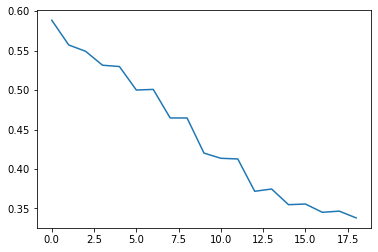

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

score = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_res, y_res)
  y_pred = knn.predict(X_test)
  score_1 = f1_score(y_test, y_pred)
  score.append(score_1)
plt.plot(score)
plt.show()

## Logistic regression - parameter tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
kf = KFold(n_splits = 10, shuffle = True)

params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10, 20, 50],
          'tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

          
cls = LogisticRegression()
search = GridSearchCV(cls, params, cv = kf.split(data_vec, y), n_jobs = -1, scoring = 'f1')
search.fit(data_vec, y)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000012580220EB0>,
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10,
                               20, 50],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='f1')

In [41]:
pred = search.predict(X_test)

In [42]:
f1_score(y_test,pred)

0.9916963226571768

Logistic regression with parameter tuning has the maximum f1 score